(2048,)
Signal to Noise Ratio (SNR) after denoising: 8.20 dB


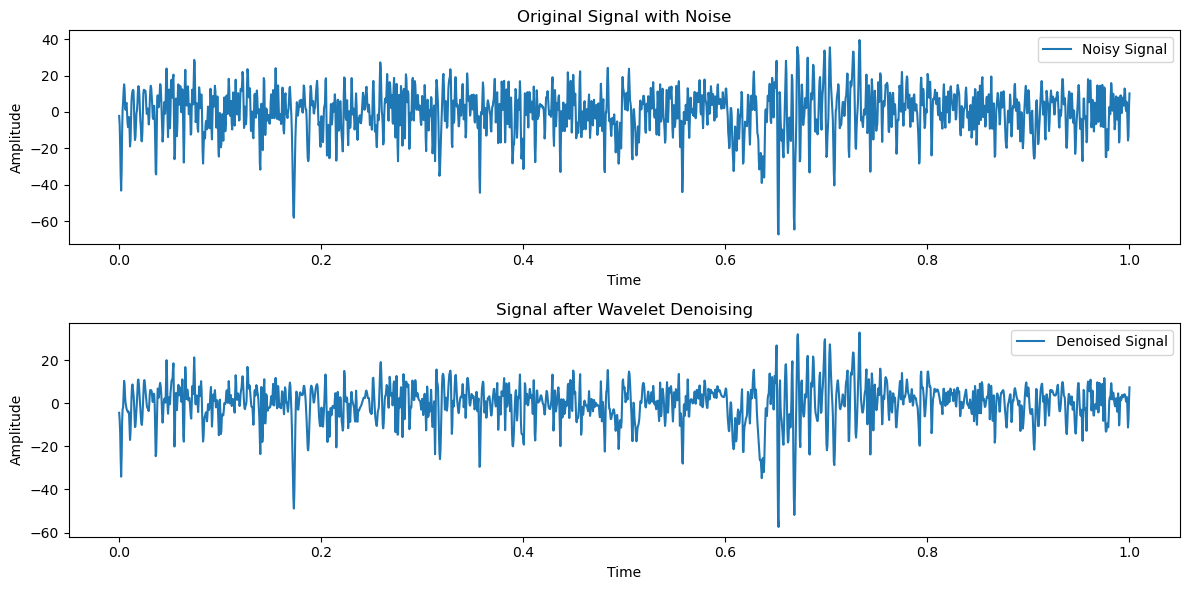

已保存


In [18]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 加载或生成信号数据
np.random.seed(0)
# N = 2048
# t = np.linspace(0, 1, N)
# signal = np.sin(2 * np.pi * 50 * t) + np.random.normal(size=N) * 0.5

signal = np.loadtxt('F:\现场项目\格兰富诊断\Dcloud诊断数据//#2热网循环泵//datagelafu//20240225095853.txt')
print(signal.shape)
# 小波去噪参数设置
waveletName = 'sym8'
level = 6 
thresholdType = 'soft'

# 小波分解
coeffs = pywt.wavedec(signal, waveletName, level=level)

# 估计噪声标准差并计算阈值

# # 设置软阈值
threshold = np.median(np.abs(coeffs[-1])) / 0.6745
coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# 应用阈值到细节系数
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], value=threshold, mode=thresholdType)

# 小波重构得到去噪信号
clean_signal = pywt.waverec(coeffs, waveletName)

# 绘制原信号与去噪信号的比较
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Noisy Signal')
plt.title('Original Signal with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, clean_signal, label='Denoised Signal')
plt.title('Signal after Wavelet Denoising')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# 计算并显示信噪比(SNR)
noise_residual = signal - clean_signal
SNR_dB = 10 * np.log10(np.sum(signal**2) / np.sum(noise_residual**2))
print(f'Signal to Noise Ratio (SNR) after denoising: {SNR_dB:.2f} dB')

plt.tight_layout()
plt.show()

np.savetxt('F:\现场项目\格兰富诊断\Dcloud诊断数据//#2热网循环泵//datagelafu//20240225095853_processed_signal.txt', clean_signal)
print('已保存')